In [2]:
import pandas as  pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('classic')
import seaborn as sns

from matplotlib.ticker import FormatStrFormatter

from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from geopy.geocoders import Nominatim







# 3.Feature Engineering

## Объеденяем значения  категориальных колонок входящих менее, чем в 0,1% выборки в other

In [3]:
df_to_FE = pd.read_csv('data/df_to_FE_final.csv', low_memory=False)
df_to_FE

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781969,9055415581448263752.1640159305.1640159305,2.108378e+09,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,VlqBmecIOXWjCWUmQkLd,desktop,Windows,Microsoft,NaN,1920x1080,Chrome,Russia,Moscow,0
1781970,9055421130527858185.1622007305.1622007305,2.108380e+09,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,iOS,Apple,NaN,390x844,Safari,Russia,Stavropol,0
1781971,9055422955903931195.1636979515.1636979515,2.108380e+09,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,0
1781972,905543020766873816.1638189404.1638189404,2.108382e+08,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk,0


In [4]:
#списко типов привлечения
df_visit_per_utm_medium = df_to_FE.groupby(['utm_medium'], as_index=False)[['session_id']].count()
df_visit_per_utm_medium = df_visit_per_utm_medium.rename(columns={'session_id': 'number_of_visits'})
df_visit_per_utm_medium

,utm_medium,number_of_visits
0,CPM,39
1,Sbol_catalog,1
2,app,1222
3,article,15
4,banner,828142
5,blogger_channel,7892
6,blogger_header,762
7,blogger_stories,4261
8,catalogue,4
9,cbaafe,43


In [5]:
#Выводим список типов привлечения, которые привели более 0.1%
utm = df_visit_per_utm_medium.apply(lambda x: 'other' if x.number_of_visits / len(df_to_FE) * 100 < 0.1  else x.utm_medium , axis=1)
list_utm = []
for i in range (0, len(utm)):
    if utm[i] != 'other':
        list_utm.append(utm[i])
list_utm

['banner',
 'blogger_channel',
 'blogger_stories',
 'cpa',
 'cpc',
 'cpm',
 'cpv',
 'email',
 'organic',
 'post',
 'push',
 'referral',
 'smartbanner',
 'stories',
 'tg']

In [6]:
#Меняем типы привлечения, котрые привели менее 0.1% на other
df_to_FE['utm_medium']= df_to_FE.apply(lambda x: 'other' if x.utm_medium not in list_utm else x.utm_medium, axis=1)


In [7]:
#Список каналов привлечения
df_utm_source = df_to_FE.groupby(['utm_source'], as_index=False)[['session_id']].count()
df_utm_source = df_utm_source.rename(columns={'session_id': 'number_of_visits'})
df_utm_source

,utm_source,number_of_visits
0,AHgbtEjTEsiUMJouiDYS,14
1,ANoZJgYuPrWNkAAchryx,11
2,ArbfvYgWhqxkzywKqpQf,19
3,AuJjYKxJakEqFnCmyFtz,3
4,BAZCuyHZnaPrMGOMrcCQ,1
...,...,...
275,zGUBrOvMRpLqBkJPUsYo,2
276,zPJpddwzkFqLMSYgtDqy,1
277,zhqxcsahQYAzJvRzebNp,29
278,zslzdtckVsyxcYqKBRRn,3


In [8]:
#Выводим список каналов, которые привели более 0.1% от выборки
utm_source = df_utm_source.apply(lambda x: 'other' if x.number_of_visits / len(df_to_FE) * 100 < 0.1  else x.utm_source , axis=1)
list_utm_source = []
for i in range (0, len(utm_source)):
    if utm_source[i] != 'other':
        list_utm_source.append(utm_source[i])
list_utm_source

['BHcvLfOaCWvWTykYqHVe',
 'GpAkIXsclxDGyILfNlrR',
 'ISrKoXQCxqqYvAZICvjs',
 'IZEXUFLARCUMynmHNBGo',
 'MvfHsxITijuriZxsqZqt',
 'PlbkrSYoHuZBWfYjYnfw',
 'QxAxdyPLuQMEcrdZWdWb',
 'RmEBuqrriAfAVsLQQmhk',
 'SzZERoLMmrEUEhDaYcyN',
 'TxKUcPpthBDPieTGmVhx',
 'ZpYIoDJMcFzVoPFsHGJL',
 'aXQzDWsJuGXeBXexNHjc',
 'bByPQxmDaMXgpHeypKSM',
 'eLzNJHzPelJpEyBwMrKo',
 'fDLlAcSmythWSCVMvqvL',
 'fgymSoTvjKPEgaIJqsiH',
 'gDBGzjFKYabGgSPZvrDH',
 'gVRrcxiDQubJiljoTbGm',
 'geDcueAOghDzHkGMmdOq',
 'ghoaGAksqhKomdFrxgyJ',
 'hTjLvqNxGggkGnxSCaTm',
 'iNFgfQPqHPBuvGCYtrQE',
 'jaSOmLICuBzCFqHfBdRg',
 'kjsLglQLzykiRbcDiGcD',
 'nSReTmyFtbSjlPrTKoaX',
 'nmfptFmSirEqNzAzqbXA',
 'oZCzWSykfixnjMPDNjSU',
 'vFcAhRxLfOWKhvxjELkx']

In [9]:
#Меняем каналы привлечения, с котрых пришло менее 0.1% на other
df_to_FE['utm_source'] = df_to_FE.apply(lambda x: 'other' if x.utm_source not in list_utm_source else x.utm_source, axis=1)
df_to_FE['utm_source']

0          ZpYIoDJMcFzVoPFsHGJL
1          MvfHsxITijuriZxsqZqt
2          ZpYIoDJMcFzVoPFsHGJL
3          kjsLglQLzykiRbcDiGcD
4          kjsLglQLzykiRbcDiGcD
                   ...         
1781969    BHcvLfOaCWvWTykYqHVe
1781970    fDLlAcSmythWSCVMvqvL
1781971    fDLlAcSmythWSCVMvqvL
1781972    ZpYIoDJMcFzVoPFsHGJL
1781973    fgymSoTvjKPEgaIJqsiH
Name: utm_source, Length: 1781974, dtype: object

In [ ]:
#Группируем рекламу в соц сетях
#ad_on_SM = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs', 
#            'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']
#df_to_FE['utm_source'] = df_to_FE.apply(lambda x: 'social_media' if x.utm_source in ad_on_SM else x.utm_source, axis=1)
#df_to_FE['utm_source']

In [10]:
#список моделей устройств
df_visit_device_brand = df_to_FE.groupby(['device_brand'], as_index=False)[['session_id']].count()
df_visit_device_brand = df_visit_device_brand.rename(columns={'session_id': 'number_of_visits'})
df_visit_device_brand

,device_brand,number_of_visits
0,A1,5
1,AGM,48
2,AT&T,3
3,Acer,47
4,Advan,3
...,...,...
195,ZTE,6136
196,iNew,31
197,itel,1061
198,myPhone,1


In [11]:
#Список моделей устройств через которые прило более 0.1%
dev_br = df_visit_device_brand.apply(lambda x: 'other' if x.number_of_visits / len(df_to_FE) * 100 < 0.1  else x.device_brand , axis=1)
list_dev_br = []
for i in range (0, len(dev_br)):
    if dev_br[i] != 'other':
        list_dev_br.append(dev_br[i])
list_dev_br

['Apple',
 'Asus',
 'Blackview',
 'Google',
 'Huawei',
 'LG',
 'Lenovo',
 'Meizu',
 'Microsoft',
 'Motorola',
 'Nokia',
 'OPPO',
 'OnePlus',
 'Other',
 'Realme',
 'Samsung',
 'Sony',
 'Tecno',
 'Vivo',
 'Xiaomi',
 'ZTE']

In [12]:
#Меняем марки устройства, с котрых пришло менее 0.1% на other
df_to_FE['device_brand'] = df_to_FE.apply(lambda x: 'other' if x.device_brand not in list_dev_br else x.device_brand, axis=1)
df_to_FE['device_brand']

0             Huawei
1            Samsung
2             Huawei
3             Xiaomi
4             Xiaomi
             ...    
1781969    Microsoft
1781970        Apple
1781971        Apple
1781972       Xiaomi
1781973        Other
Name: device_brand, Length: 1781974, dtype: object

In [13]:
#Список видов браузера
df_visit_device_browser = df_to_FE.groupby(['device_browser'], as_index=False)[['session_id']].count()
df_visit_device_browser = df_visit_device_browser.rename(columns={'session_id': 'number_of_visits'})
df_visit_device_browser

,device_browser,number_of_visits
0,Amazon Silk,6
1,Android,19
2,Android Browser,47
3,Android Runtime,241
4,Android Webview,53474
5,Chrome,978416
6,Coc Coc,6
7,Edge,15710
8,Firefox,16309
9,Instagram 158.0.0.30.123 Android,3


In [14]:
#Список видов браузера с которых пришло более 0.1%
dev_brow = df_visit_device_browser.apply(lambda x: 'other' if x.number_of_visits / len(df_to_FE) * 100 < 0.1  else x.device_browser , axis=1)
list_dev_brow = []
for i in range (0, len(dev_brow)):
    if dev_brow[i] != 'other':
        list_dev_brow.append(dev_brow[i])
list_dev_brow

['Android Webview',
 'Chrome',
 'Edge',
 'Firefox',
 'Opera',
 'Safari',
 'Safari (in-app)',
 'Samsung Internet',
 'YaBrowser']

In [15]:
#Меняем наименование браузеров, с котрых пришло менее 0.1% на other
df_to_FE['device_browser'] = df_to_FE.apply(lambda x: 'other' if x.device_browser not in list_dev_brow else x.device_browser, axis=1)
df_to_FE['device_browser'].value_counts()


device_browser
Chrome              978416
Safari              449877
YaBrowser           127796
Safari (in-app)      67168
Android Webview      53474
Samsung Internet     45516
Opera                25649
Firefox              16309
Edge                 15710
other                 2059
Name: count, dtype: int64

In [16]:
#Список рекламных компаний
df_utm_campaign = df_to_FE.groupby(['utm_campaign'], as_index=False)[['session_id']].count()
df_utm_campaign = df_utm_campaign.rename(columns={'session_id': 'number_of_visits'})
df_utm_campaign

,utm_campaign,number_of_visits
0,AdtHYglxfCpTpwZeTAuW,1
1,AqudXfUnmXWSDWVGYaXr,2281
2,BAZCuyHZnaPrMGOMrcCQ,467
3,BHcvLfOaCWvWTykYqHVe,30
4,BHqsCPwtnpaQSryaVXya,13
...,...,...
401,zfwIehuEfWYdYrEZgRLo,784
402,zhmDvzviWNMgxXuZASKu,1
403,zmnpxOKDENholtspXiGy,711
404,zxoiLxhuSIFrCeTLQVWZ,12503


In [17]:
#Список рекламных компаний которые привели более 0.1%
utm_camp = df_utm_campaign.apply(lambda x: 'other' if x.number_of_visits / len(df_to_FE) * 100 < 0.1  else x.utm_campaign , axis=1)
list_utm_camp= []
for i in range (0, len(utm_camp)):
    if utm_camp[i] != 'other':
        list_utm_camp.append(utm_camp[i])
list_utm_camp

['AqudXfUnmXWSDWVGYaXr',
 'BVKxkCOHKUOvkpbrLMgZ',
 'DnEUulZAecfGPvdtZBYS',
 'DsqwamlMwRgMTyspCjFR',
 'ESphyUeLTPINiYALHWrO',
 'FTjNLDyTrXaWYgZymFkV',
 'GWZGdHKPgmZPNPwkJshU',
 'HEimDfYZIzuQXDZAAcEW',
 'IKQsApKuPmZqqmhieEgf',
 'IZEXUFLARCUMynmHNBGo',
 'JwYIveaHVpeeRZloQCfF',
 'KgicpPxiEQfzPlPwQZJq',
 'LEoPHuyFvzoNfnzGgfcd',
 'LTuZkdKfxRGVceoWkVyg',
 'LUlvACDKkkOkiSuiwaBs',
 'LwJZxKuWmvOhPsaCeRjG',
 'MXqmDyetMTICSSitTjWV',
 'PXQWdUxeUoXfoKzTBGpY',
 'QEejXfOCtOMFLZqIPApp',
 'QdLfySaGXolfTBSNVfHn',
 'RoDitORHdzGfGhNCyEMy',
 'SgIUDYUKnyWHVowUOqid',
 'TmThBvoCcwkCZZUWACYq',
 'UjApcvnaHtkydRkrLYuv',
 'UvuMsOSDBWQGOIbDbXfV',
 'VBmazutCflYumtDHrQYe',
 'WiILFRDQbcHDHNvHzGpX',
 'WlbWUObZWvsimzdFdLYw',
 'XHNUiSKKGTEpSAlaVMFQ',
 'YCKgTzTDywjcWyQudGch',
 'YDIkQmcjRkpdxGbLLtNN',
 'ascPqxFuFewWWZSVMpkh',
 'bJJuEXRheRIxXEaYIXqM',
 'bgTYkDHjOsJzMUtoGhiQ',
 'bxOTvPtyGSdUrbwoXCPO',
 'eimRuUrNhZLAYcwRrNXu',
 'gVwpGdJDpteNmFIatPTG',
 'gecBYcKZCPMcVYdSSzKP',
 'hkvDVxqLOzGjGaoNiNzN',
 'jqlUOdZBNZYfInQVcZlS',


In [18]:
#Меняем наименование браузеров, с котрых пришло менее 0.1% на other
df_to_FE['utm_campaign'] = df_to_FE.apply(lambda x: 'other' if x.utm_campaign not in list_utm_camp else x.utm_campaign, axis=1)
df_to_FE['utm_campaign'].value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    644079
LEoPHuyFvzoNfnzGgfcd    330612
FTjNLDyTrXaWYgZymFkV    237353
gecBYcKZCPMcVYdSSzKP    137788
other                    73270
XHNUiSKKGTEpSAlaVMFQ     24132
sbJRYgVfvcnqKJNDDYIr     20515
okTXSMadDkjvntEHzIjp     18480
LwJZxKuWmvOhPsaCeRjG     17115
SgIUDYUKnyWHVowUOqid     16155
RoDitORHdzGfGhNCyEMy     15257
bxOTvPtyGSdUrbwoXCPO     15106
TmThBvoCcwkCZZUWACYq     15001
zxoiLxhuSIFrCeTLQVWZ     12503
bJJuEXRheRIxXEaYIXqM     12072
YCKgTzTDywjcWyQudGch     11965
nSReTmyFtbSjlPrTKoaX     11492
QEejXfOCtOMFLZqIPApp     10201
vRLTQQKAsFQMxbcHGPhu      9398
eimRuUrNhZLAYcwRrNXu      7982
jvsVVQVKRfBIqBDBuCkq      7815
VBmazutCflYumtDHrQYe      7316
MXqmDyetMTICSSitTjWV      7101
QdLfySaGXolfTBSNVfHn      6994
PXQWdUxeUoXfoKzTBGpY      6941
kVOrIKZFrEYGvixPclal      6924
KgicpPxiEQfzPlPwQZJq      6786
JwYIveaHVpeeRZloQCfF      6492
jqlUOdZBNZYfInQVcZlS      6426
WiILFRDQbcHDHNvHzGpX      5883
IKQsApKuPmZqqmhieEgf      5469
UvuMsOSDBWQGOIbDbXfV      

In [19]:
#Список utm_adcontent
df_utm_adcontent = df_to_FE.groupby(['utm_adcontent'], as_index=False)[['session_id']].count()
df_utm_adcontent = df_utm_adcontent.rename(columns={'session_id': 'number_of_visits'})
df_utm_adcontent

,utm_adcontent,number_of_visits
0,AByCsfZNGxnFrQkYzVAq,33
1,AIONnJpjXjEluFHEjOyg,595
2,AREbWGOhRGJXAffGqZTc,81
3,AbzcnvSMiZVQpjoceeKU,275
4,AdeErYgVTbRcAWtHrMHq,5594
...,...,...
275,ywScCjfXuJyLkJMzfjEB,18
276,zEHnFIjqNyjvDvXKeMqx,250
277,zQEFTgQvqExfbldEpotc,1
278,zjrfBVIiQQBGguNcgGog,2


In [20]:
#Список utm_adcontent с которых пришло более 0.1%
utm_adcontent = df_utm_adcontent.apply(lambda x: 'other' if x.number_of_visits / len(df_to_FE) * 100 < 0.1  else x.utm_adcontent , axis=1)
list_utm_adcontent = []
for i in range (0, len(utm_adcontent)):
    if utm_adcontent[i] != 'other':
        list_utm_adcontent.append(utm_adcontent[i])
list_utm_adcontent

['AdeErYgVTbRcAWtHrMHq',
 'JNHcPlZPxEMWDnRiyoBf',
 'LLfCasrxQzJIyuldcuWy',
 'LcGIUNPUAmXtQJaDfFBR',
 'PkybGvWbaqORmxjNunqZ',
 'SAVVWaMghGnnvPOqMOIt',
 'SOkCdPxfUcZUzzOdgGES',
 'TuyPWsGQruPMpKvRxeBF',
 'UxrnyMlRBSOhOjytXnMG',
 'WYLajZgbUhGimwBKDZUH',
 'XKsYZiUFcdkUXQpoLKyS',
 'XSkXBCPfnJjvxbfeewtd',
 'aYAcKhelKzYpXrRYknSP',
 'dUuXlWzvmhDSyclWRhNP',
 'guyNoEvzgofQvvwExGOq',
 'nNqUcgFgcqQbTVSvgaHr',
 'vCIpmpaGBnIQhyYNkXqp',
 'xhoenQgDQsgfEPYNPwKO',
 'xnyHaukLtAvgViiZSyBC',
 'yYdBRbPmBMUZHXwqGxNx']

In [21]:
#Меняем utm_adcontent, с котрых пришло менее 0.1% на other
df_to_FE['utm_adcontent'] = df_to_FE.apply(lambda x: 'other' if x.utm_adcontent not in list_utm_adcontent else x.utm_adcontent, axis=1)
df_to_FE['utm_adcontent'].value_counts()

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1281730
vCIpmpaGBnIQhyYNkXqp     183341
xhoenQgDQsgfEPYNPwKO     105628
PkybGvWbaqORmxjNunqZ      59997
other                     33292
LLfCasrxQzJIyuldcuWy      18208
TuyPWsGQruPMpKvRxeBF      17886
UxrnyMlRBSOhOjytXnMG      13351
dUuXlWzvmhDSyclWRhNP      10080
yYdBRbPmBMUZHXwqGxNx       9635
WYLajZgbUhGimwBKDZUH       8161
SOkCdPxfUcZUzzOdgGES       6820
nNqUcgFgcqQbTVSvgaHr       6073
AdeErYgVTbRcAWtHrMHq       5594
aYAcKhelKzYpXrRYknSP       4959
XKsYZiUFcdkUXQpoLKyS       3989
XSkXBCPfnJjvxbfeewtd       3965
SAVVWaMghGnnvPOqMOIt       2532
xnyHaukLtAvgViiZSyBC       2500
guyNoEvzgofQvvwExGOq       2207
LcGIUNPUAmXtQJaDfFBR       2026
Name: count, dtype: int64

## Создаем новые фичи

In [22]:
df_to_FE['visit_date'] = pd.to_datetime(df_to_FE['visit_date'], utc=True)#Преобразовать объект времени в datetime

In [23]:
#выделяем из даты визита день месяца в отдельную колонку day
df_to_FE['day'] = df_to_FE['visit_date'].dt.day
df_to_FE.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target,day
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0,24
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0,14
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0,28
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,NaN,mobile,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,29
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,29


In [24]:
#выделяем из даты визита день недели в отдельную колонку dayofweek
df_to_FE['dayofweek'] = df_to_FE.visit_date.dt.weekday
df_to_FE.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target,day,dayofweek
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0,24,2
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0,14,6
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0,28,1
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,NaN,...,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,29,5
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,Android,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,29,5


In [25]:
#выделяем из даты визита год в отдельную колонку year
year = df_to_FE['visit_date'].dt.year
year.value_counts()
#так как год только один, то новую колонку не создаем

visit_date
2021    1781974
Name: count, dtype: int64

In [26]:
#выделяем из даты визита месяц в отдельную колонку mounth
df_to_FE['mounth'] = df_to_FE['visit_date'].dt.month
df_to_FE.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target,day,dayofweek,mounth
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0,24,2,11
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0,14,6,11
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0,28,1,12
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,NaN,...,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,29,5,5
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0,29,5,5


In [27]:
#выделяем из даты визита час в отдельную колонку hour
df_to_FE['hour'] = df_to_FE['visit_time'].apply(lambda x: x.lower().split(':')[0])
df_to_FE.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target,day,dayofweek,mounth,hour
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,NaN,360x720,Chrome,Russia,Zlatoust,0,24,2,11,14
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,NaN,385x854,Samsung Internet,Russia,Moscow,0,14,6,11,08
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,NaN,360x720,Chrome,Russia,Krasnoyarsk,0,28,1,12,02
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,NaN,...,NaN,393x786,Chrome,Russia,Moscow,0,29,5,5,05
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,NaN,393x786,Chrome,Russia,Moscow,0,29,5,5,05


In [28]:
#выделяем из часа визита время суток в отдельную колонку day_time
df_to_FE['day_time'] = df_to_FE['hour'].apply(lambda x: 0  if x in ['21', '22', '23', '00', '01', '02', '03'] 
                                                   else (1 if x in ['03', '04', '05', '06', '07', '08', '09']
                                                   else (2 if x in ['09', '10', '11', '12', '13', '14', '15']
                                                   else (3))))


In [29]:
#Разрешение экрана переводим в общее количество пикселей на экране(перемножаем стороны)
df_to_FE['device_screen_resolution'] = df_to_FE['device_screen_resolution'].apply(lambda x: int(x.lower().split('x')[0]) * 
                                                                                  int(x.lower().split('x')[1]))
df_to_FE.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_screen_resolution,device_browser,geo_country,geo_city,target,day,dayofweek,mounth,hour,day_time
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,259200,Chrome,Russia,Zlatoust,0,24,2,11,14,2
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,328790,Samsung Internet,Russia,Moscow,0,14,6,11,08,1
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,259200,Chrome,Russia,Krasnoyarsk,0,28,1,12,02,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,NaN,...,308898,Chrome,Russia,Moscow,0,29,5,5,05,1
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,308898,Chrome,Russia,Moscow,0,29,5,5,05,1


In [30]:
#Страны делим на РФ(1) и не РФ(0)
df_to_FE['geo_country'] = df_to_FE.apply(lambda x: 1 if x.geo_country == 'Russia' else 0, axis=1)
df_to_FE.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_screen_resolution,device_browser,geo_country,geo_city,target,day,dayofweek,mounth,hour,day_time
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,259200,Chrome,1,Zlatoust,0,24,2,11,14,2
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,328790,Samsung Internet,1,Moscow,0,14,6,11,08,1
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,259200,Chrome,1,Krasnoyarsk,0,28,1,12,02,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,NaN,...,308898,Chrome,1,Moscow,0,29,5,5,05,1
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,308898,Chrome,1,Moscow,0,29,5,5,05,1


In [31]:
#Преобразовываем Тип устройства в цифровой формат, т.е. каждому типу утройства теперь дудет присвоен номер 0,1,2
le = preprocessing.LabelEncoder() #Преобразование категориальных переменных Label encoding
le.fit(df_to_FE.device_category)#Идентифицировать параметры преобразования. Преобразуем колонку Тип устройства
le.transform(df_to_FE.device_category)
df_to_FE['device_category_new'] = pd.DataFrame(le.transform(df_to_FE.device_category))
df_to_FE.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_browser,geo_country,geo_city,target,day,dayofweek,mounth,hour,day_time,device_category_new
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Chrome,1,Zlatoust,0,24,2,11,14,2,1
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,Samsung Internet,1,Moscow,0,14,6,11,08,1,1
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,Chrome,1,Krasnoyarsk,0,28,1,12,02,0,1
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,NaN,...,Chrome,1,Moscow,0,29,5,5,05,1,1
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,Chrome,1,Moscow,0,29,5,5,05,1,1


In [32]:
#Преобразование городов в числовую значения, наиболее популярным городам присваниваем значения [1,2,3,4], остальным 0

df_to_FE['geo_city_new'] = df_to_FE.geo_city.apply(lambda x: 1 if x == "Moscow" 
                                                   else(2 if x == "Saint Petersburg" 
                                                   else(3 if x == "Yekaterinburg" 
                                                   else (4 if x == "Krasnodar" 
                                                   else(0)))))
df_to_FE['geo_city_new'].value_counts()


geo_city_new
1    849075
0    581693
2    285439
3     34438
4     31329
Name: count, dtype: int64

In [34]:
#Промежуточное сохранение
df_to_FE.to_csv('data/df_to_ohe_fin.csv', index= False )

In [35]:
df_to_ohe = pd.read_csv('data/df_to_ohe_fin.csv', low_memory=False)
df_to_ohe.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,geo_country,geo_city,target,day,dayofweek,mounth,hour,day_time,device_category_new,geo_city_new
0,9055434745589932991.1637753792.1637753792,2.108383e+09,2021-11-24 00:00:00+00:00,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,1,Zlatoust,0,24,2,11,14,2,1,0
1,905544597018549464.1636867290.1636867290,2.108385e+08,2021-11-14 00:00:00+00:00,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,1,Moscow,0,14,6,11,8,1,1,1
2,9055446045651783499.1640648526.1640648526,2.108385e+09,2021-12-28 00:00:00+00:00,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,1,Krasnoyarsk,0,28,1,12,2,0,1,0
3,9055447046360770272.1622255328.1622255328,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,NaN,...,1,Moscow,0,29,5,5,5,1,1,1
4,9055447046360770272.1622255345.1622255345,2.108386e+09,2021-05-29 00:00:00+00:00,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,1,Moscow,0,29,5,5,5,1,1,1


#Преобразуем названия городов в 2 списка координат Долготы и Широты

geolocator = Nominatim(user_agent="My_GEO_Locator")

def get_coords(address, geolocator=geolocator):
    if geolocator is None:
        geolocator = Nominatim(user_agent="My_GEO_Locator")
    ret = geolocator.geocode(address)
    if ret is None:
        return None
    return ret.latitude, ret.longitude

   
df_city["coords"] = df_city["geo_city"].map(get_coords)
df_city[["lat", "long"]] = \
    pd.DataFrame(df_city.pop("coords").tolist(),
                 columns=["lat", "long"], 
                 index=df_city.index)
    
df_city

## Избавление от аномалий

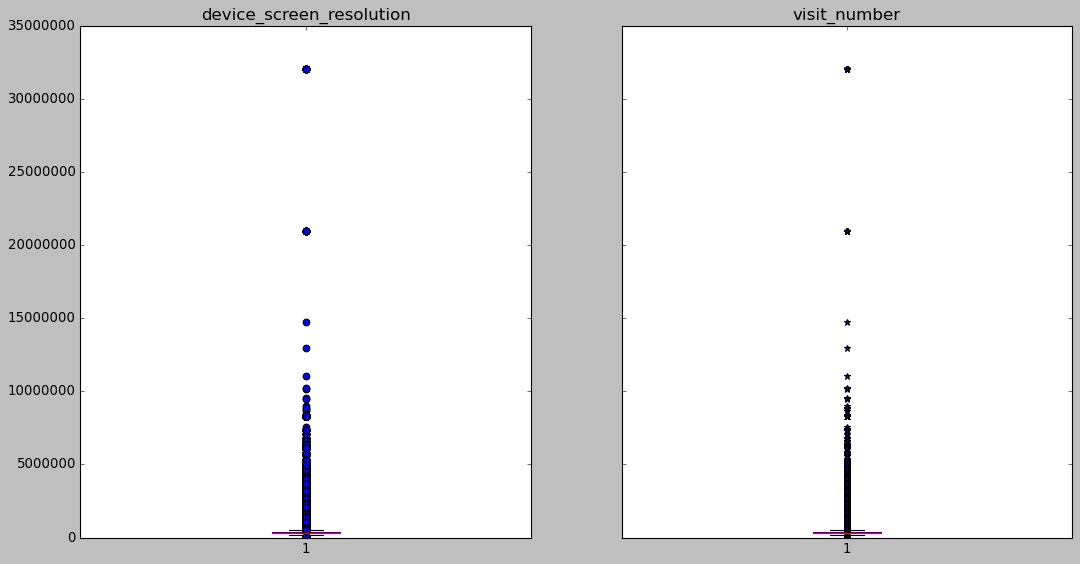

In [36]:
#посмотрим на выбросы в колонках  device_screen_resolution и visit_number
fig, ( ax_res, ax_visit_num) = plt.subplots(nrows=1, ncols=2, figsize=(16, 8), sharey=True)

ax_res.boxplot(df_to_ohe.device_screen_resolution, meanprops=dict(c='pink'), medianprops=dict(c='r'), boxprops = dict(c='blue'), sym = 'o')
ax_res.set_title('device_screen_resolution', fontsize=15)

ax_visit_num.boxplot(df_to_ohe.device_screen_resolution, meanprops=dict(c='pink'), medianprops=dict(c='r'), boxprops = dict(c='blue'), sym = '*')
ax_visit_num.set_title('visit_number', fontsize=15)

ax_res.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax_visit_num.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))

In [37]:
#находим границы для нормальных значений device_screen_resolution, используя интерквартильный размах
def calculate_outliers(data): #функция для нахождения границ
    q25 = data.quantile(0.25)
    q75 = data.quantile(0.75)
    iqr = q75 - q25
    boundaries = (q25 - 1.5 * iqr, q75 + 1.5 * iqr)

    return boundaries

boundaries = calculate_outliers(df_to_ohe.device_screen_resolution)
#Cчитаем и выводим количество выбросов в стоимости автомобиля.
is_outlier = (df_to_ohe['device_screen_resolution'] < boundaries[0]) | (df_to_ohe['device_screen_resolution'] > boundaries[1])
print('Kоличество выбросов в device_screen_resolution = ', is_outlier.sum(), 
      'граница нижняя -', boundaries[0], 'граница верхняя -', boundaries[1])

Kоличество выбросов в device_screen_resolution =  373061 граница нижняя - 136530.0 граница верхняя - 521250.0


In [38]:
#Выводим записи, в которых разрешение экрана попадает в выбросы, отсортированные device_screen_resolution.
df_cp = df_to_ohe[is_outlier].sort_values(by='device_screen_resolution')
df_cp[df_cp['target'] == 1]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,geo_country,geo_city,target,day,dayofweek,mounth,hour,day_time,device_category_new,geo_city_new
1171099,6215440109891176109.1623672501.1623672501,1.447145e+09,2021-06-14 00:00:00+00:00,15:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,NaN,...,1,Nizhny Novgorod,1,14,0,6,15,2,1,0
494671,3061512609313434581.1635888084.1635888084,7.128140e+08,2021-11-03 00:00:00+00:00,00:21:24,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,ZNhSIPchlbnKwZWcsKzz,...,1,Moscow,1,3,2,11,0,0,1,1
304504,217849921230732714.1632501165.1632501165,5.072214e+07,2021-09-24 00:00:00+00:00,19:32:45,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,1,Saint Petersburg,1,24,4,9,19,3,1,2
343038,2357365455716552666.1640173533.1640173533,5.488669e+08,2021-12-22 00:00:00+00:00,14:45:33,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,1,Vladivostok,1,22,2,12,14,2,1,0
621568,3653645508298540648.1633027693.1633027693,8.506806e+08,2021-09-30 00:00:00+00:00,21:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,NaN,...,1,Moscow,1,30,3,9,21,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
630710,3697440181711941090.1630680436.1630680436,8.608774e+08,2021-09-03 00:00:00+00:00,17:00:00,16,bByPQxmDaMXgpHeypKSM,referral,hkvDVxqLOzGjGaoNiNzN,XSkXBCPfnJjvxbfeewtd,NaN,...,1,Saint Petersburg,1,3,4,9,17,3,0,2
169220,154424305209001899.1621837739.1621837739,3.595471e+07,2021-05-24 00:00:00+00:00,09:00:00,1,fDLlAcSmythWSCVMvqvL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,1,Moscow,1,24,0,5,9,1,0,1
801538,4494757944892886537.1622445578.1622445578,1.046517e+09,2021-05-31 00:00:00+00:00,10:00:00,1,fDLlAcSmythWSCVMvqvL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,1,Khanty-Mansiysk,1,31,0,5,10,2,0,0
630707,3697440181711941090.1630679618.1630679618,8.608774e+08,2021-09-03 00:00:00+00:00,17:00:00,14,other,cpc,hkvDVxqLOzGjGaoNiNzN,XSkXBCPfnJjvxbfeewtd,NaN,...,1,Saint Petersburg,1,3,4,9,17,3,0,2


In [ ]:
#избавляться от выбросов в колонке device_screen_resolution и visit_number не будем, так как с этими строками удаляются 1 в target и снижается roc_auc
#df_to_ohe['device_screen_resolution']
#df_to_ohe = df_to_ohe[~((df_to_ohe.device_screen_resolution < boundaries[0]) | (df_to_ohe.device_screen_resolution > boundaries[1]))]
#df_to_ohe

In [39]:
#Ищем выбросы в показаниях порядкового номера визита(эту колонку просто удалим, без нее модель начинает предсказывать 1)
boundaries_visit_num = calculate_outliers(df_to_ohe.visit_number)
#Cчитаем и выводим количество выбросов 
is_outlier_visit_num = (df_to_ohe['visit_number'] < boundaries_visit_num[0]) | (df_to_ohe['visit_number'] > boundaries_visit_num[1])
print('Kоличество выбросов в visit_number = ', is_outlier_visit_num.sum(), boundaries_visit_num[0], boundaries_visit_num[1] )
#избавляемся от выбросов в колонке visit_number
#df_to_ohe = df_to_ohe[~((df_to_ohe.visit_number < boundaries_visit_num[0]) | (df_to_ohe.visit_number > boundaries_visit_num[1]))]
#df_to_ohe

Kоличество выбросов в visit_number =  154129 -0.5 3.5


In [40]:
df_cp = df_to_ohe[is_outlier_visit_num].sort_values(by='visit_number')
df_cp[df_cp['target'] == 1]

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,geo_country,geo_city,target,day,dayofweek,mounth,hour,day_time,device_category_new,geo_city_new
387126,256240404794042112.1624894806.1624894806,5.966062e+07,2021-06-28 00:00:00+00:00,18:00:00,4,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,1,Sochi,1,28,0,6,18,3,0,0
387184,2562684537637978276.1632453474.1632453540,5.966715e+08,2021-09-24 00:00:00+00:00,06:19:00,4,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,UKNBOHebRIIsQRsjNKay,...,1,Moscow,1,24,4,9,6,1,1,1
387263,2563052925564443450.1630267599.1630267599,5.967573e+08,2021-08-29 00:00:00+00:00,23:00:00,4,ISrKoXQCxqqYvAZICvjs,post,ESphyUeLTPINiYALHWrO,JNHcPlZPxEMWDnRiyoBf,NaN,...,1,Saint Petersburg,1,29,6,8,23,0,1,2
1076989,577490395035637545.1640190062.1640190062,1.344575e+08,2021-12-22 00:00:00+00:00,19:21:02,4,bByPQxmDaMXgpHeypKSM,other,other,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,1,Saint Petersburg,1,22,2,12,19,3,1,2
1076236,577136919224464994.1629797104.1629797104,1.343752e+08,2021-08-24 00:00:00+00:00,12:00:00,4,fDLlAcSmythWSCVMvqvL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,1,Saint Petersburg,1,24,1,8,12,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1452068,7518333712042258254.1640181970.1640181970,1.750498e+09,2021-12-22 00:00:00+00:00,17:06:10,556,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,hAmNSZmQkKQKAjZEGlgb,...,1,Moscow,1,22,2,12,17,3,0,1
1452071,7518333712042258254.1640250029.1640250029,1.750498e+09,2021-12-23 00:00:00+00:00,12:00:29,558,kjsLglQLzykiRbcDiGcD,cpc,XHNUiSKKGTEpSAlaVMFQ,JNHcPlZPxEMWDnRiyoBf,hAmNSZmQkKQKAjZEGlgb,...,1,Moscow,1,23,3,12,12,2,0,1
1452072,7518333712042258254.1640250075.1640250075,1.750498e+09,2021-12-23 00:00:00+00:00,12:01:15,559,kjsLglQLzykiRbcDiGcD,organic,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,UKNBOHebRIIsQRsjNKay,...,1,Moscow,1,23,3,12,12,2,0,1
1452074,7518333712042258254.1640258901.1640258901,1.750498e+09,2021-12-23 00:00:00+00:00,14:28:21,561,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,hAmNSZmQkKQKAjZEGlgb,...,1,Moscow,1,23,3,12,14,2,0,1


# 4.Data Visualization

In [41]:
#Считаем соотношение классов в целевой переменной
one = (len(df_to_ohe[df_to_ohe['target']== 1]) / len(df_to_ohe)) * 100
zero = (len(df_to_ohe[df_to_ohe['target']== 0]) / len(df_to_ohe)) * 100
print('Процент целевых событий(1):\n', round(one, 3) , 
      '\nПроцент НЕ целевых событий(0):\n', round(zero, 3))

Процент целевых событий(1):
 2.823 
Процент НЕ целевых событий(0):
 97.177


In [42]:
stats = df_to_ohe.groupby(['target'], as_index=False)[['session_id']].count()
stats = stats.rename(columns={'session_id': 'count'})
stats

,target,count
0,0,1731660
1,1,50314


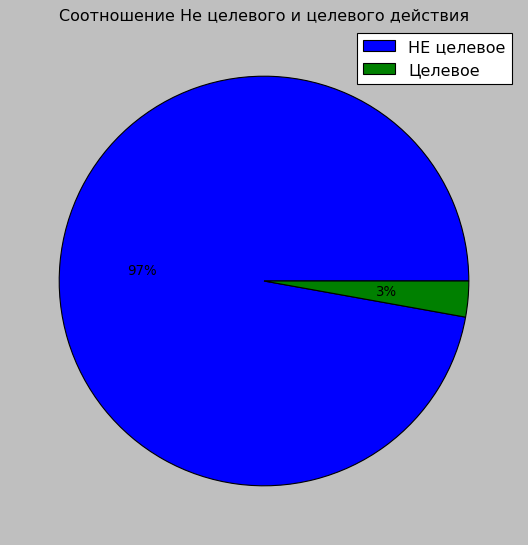

In [43]:
plt.figure(figsize=(10, 8))
color=['red', 'green']
plt.pie(stats['count'], labels=stats['target'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Соотношение Не целевого и целевого действия")
plt.legend(('НЕ целевое', 'Целевое' ))
plt.show();


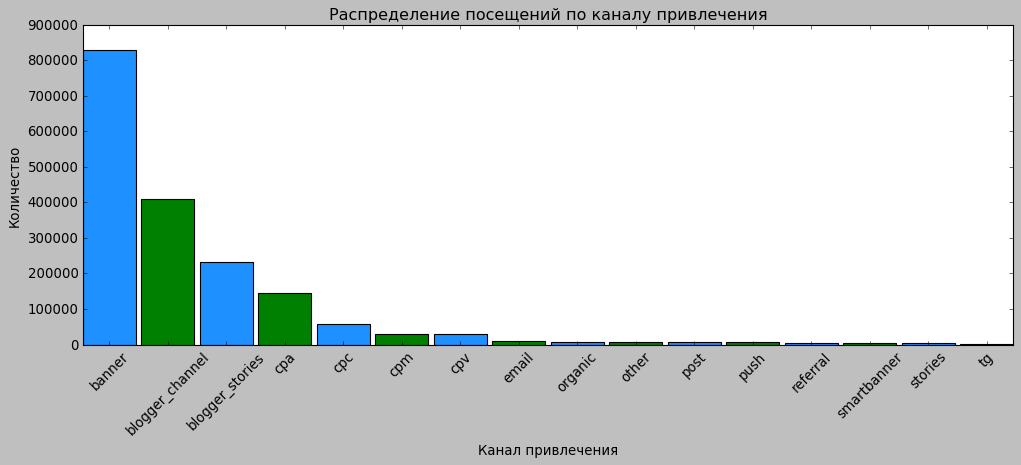

In [44]:
df_visit_utm_medium = df_to_ohe.groupby(['utm_medium'], as_index=False)[['session_id']].count()
df_visit_utm_medium = df_visit_utm_medium.rename(columns={'session_id': 'number_of_visits'})

plt.figure(figsize=(15, 5))
plt.bar(df_visit_utm_medium.utm_medium, df_visit_utm_medium.number_of_visits.sort_values(ascending=False), 
        color=['dodgerblue', "green"], width = 0.9)
plt.xticks(rotation = 45)
plt.xlabel('Канал привлечения')
plt.ylabel('Количество')
plt.title('Распределение посещений по каналу привлечения');

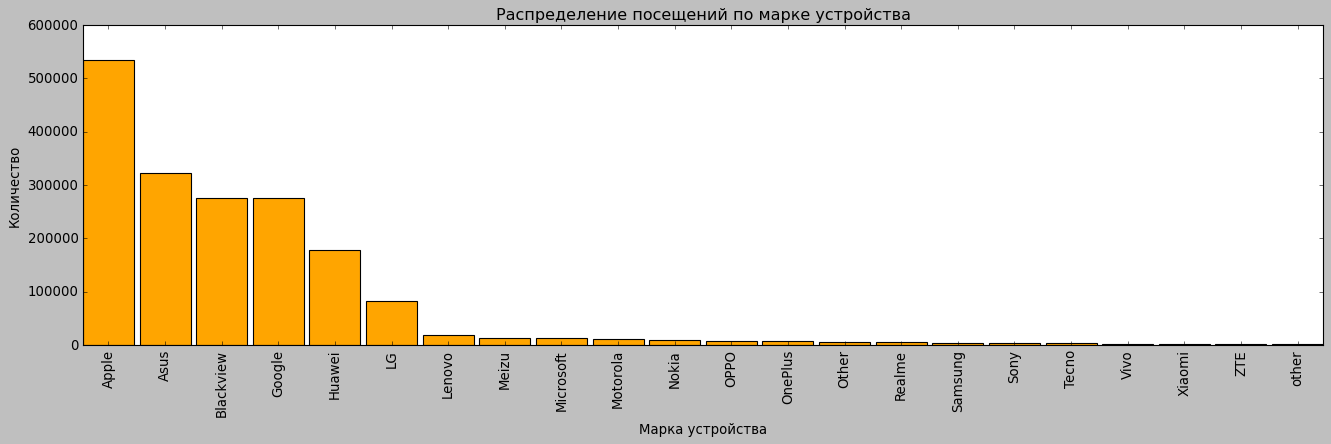

In [45]:
df_visit_per_device = df_to_ohe.groupby(['device_brand'], as_index=False)[['session_id']].count()
df_visit_per_device = df_visit_per_device.rename(columns={'session_id': 'number_of_visits'})

plt.figure(figsize=(20, 5))
plt.bar(df_visit_per_device.device_brand, df_visit_per_device.number_of_visits.sort_values(ascending=False), 
        color=['orange'], width = 0.9)
plt.xticks(rotation = 90)
plt.xlabel('Марка устройства')
plt.ylabel('Количество')
plt.title('Распределение посещений по марке устройства');

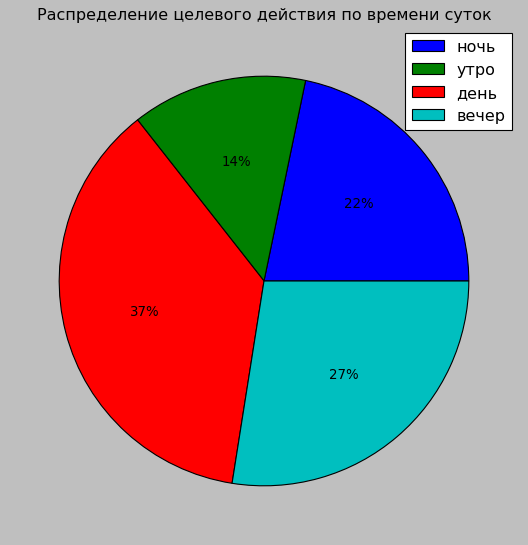

In [46]:
df_stat = df_to_ohe[df_to_ohe['target'] == 1].groupby(['day_time'], as_index=False)[['session_id']].count()
df_stat = df_stat.rename(columns={'session_id': 'number_of_target'})

plt.figure(figsize=(12, 8))
color=['red', 'green']
plt.pie(df_stat['number_of_target'], labels=df_stat['day_time'], labeldistance=None, autopct = '%1.0f%%')
plt.title("Распределение целевого действия по времени суток")
plt.legend(('ночь', 'утро', 'день', 'вечер' ))
plt.show();

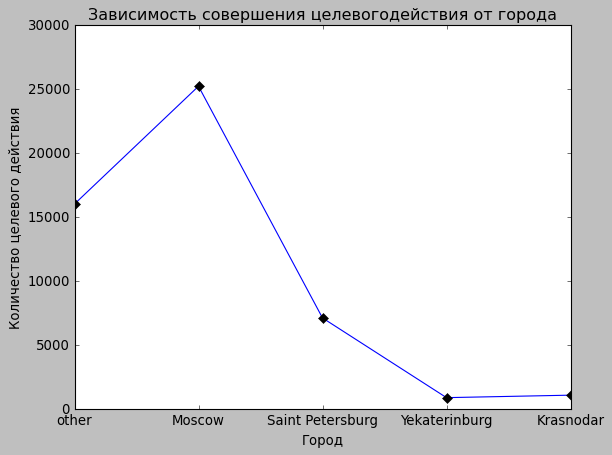

In [47]:
df_stats = df_to_ohe[df_to_ohe['target'] == 1].groupby(['geo_city_new'], as_index=False)[['session_id']].count()
df_stats = df_stats.rename(columns={'session_id': 'number_of_target'})
df_stats['geo_city_new'] = df_stats['geo_city_new'].apply(lambda x: "Moscow" if x ==  1
                                                   else("Saint Petersburg" if x ==  2
                                                   else("Yekaterinburg"  if x == 3
                                                   else ("Krasnodar" if x ==  4
                                                   else('other')))))

plt.figure()
plt.plot(df_stats['geo_city_new'], df_stats['number_of_target'], color = 'blue', marker = "D", markerfacecolor = "black" )
plt.title("Зависимость совершения целевогодействия от города")
plt.xlabel('Город')
plt.ylabel('Количество целевого действия')

plt.show();

In [48]:
df_to_ohe.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'target', 'day', 'dayofweek', 'mounth',
       'hour', 'day_time', 'device_category_new', 'geo_city_new'],
      dtype='object')

## Анализ корреляций

In [49]:
df = df_to_ohe[['target','visit_number', 'device_screen_resolution', 'mounth',  'hour',
            'geo_country', 'day', 'dayofweek', 'day_time',
              'device_category_new', 'geo_city_new']]
df.corr()

,target,visit_number,device_screen_resolution,mounth,hour,geo_country,day,dayofweek,day_time,device_category_new,geo_city_new
target,1.000000,0.025528,0.004453,-0.049058,0.000097,0.005744,-0.000787,-0.013836,0.008336,-0.011888,-0.000479
visit_number,0.025528,1.000000,0.098041,0.013679,0.004554,0.012951,-0.010592,-0.017215,0.031259,-0.134243,-0.012543
device_screen_resolution,0.004453,0.098041,1.000000,-0.101934,-0.010270,-0.135789,0.000245,-0.072963,0.042937,-0.756976,-0.037435
mounth,-0.049058,0.013679,-0.101934,1.000000,0.023924,0.008592,-0.161741,0.094249,0.024683,0.118413,-0.032793
hour,0.000097,0.004554,-0.010270,0.023924,1.000000,-0.002388,-0.005422,-0.022919,0.268108,0.009688,0.015022
geo_country,0.005744,0.012951,-0.135789,0.008592,-0.002388,1.000000,0.001484,0.021068,-0.004016,0.027589,0.158699
day,-0.000787,-0.010592,0.000245,-0.161741,-0.005422,0.001484,1.000000,-0.055829,-0.012017,-0.003330,0.000992
dayofweek,-0.013836,-0.017215,-0.072963,0.094249,-0.022919,0.021068,-0.055829,1.000000,-0.016974,0.076585,-0.000512
day_time,0.008336,0.031259,0.042937,0.024683,0.268108,-0.004016,-0.012017,-0.016974,1.000000,-0.049850,-0.000470
device_category_new,-0.011888,-0.134243,-0.756976,0.118413,0.009688,0.027589,-0.003330,0.076585,-0.049850,1.000000,0.021675


target

Как можно заметить  очень слабо коррелирует со всеми числовыми признаками, наибольша корреляция с месяцем(-0.049), в поздних месяцах совершение целевого дейставия ниже, так как коэф. корреляции отрицательный.
Так же есть зависимость от числа посещений клиента, чем чаще клиент заходит на сайт, тем больше вероятность совершения целевого действия, так как коэф. положительный.
Чем ближе к выходным, тем меньше вероятность целевого события
Час практически не влияет на целевое действие, время суток уже влияет сильнее

Так же наблюдается связь между  размером экрана, и тем как часто пользователь возвращается на сайт
Есть сильная связь размера экрана и категории устройста, что всполне логично.




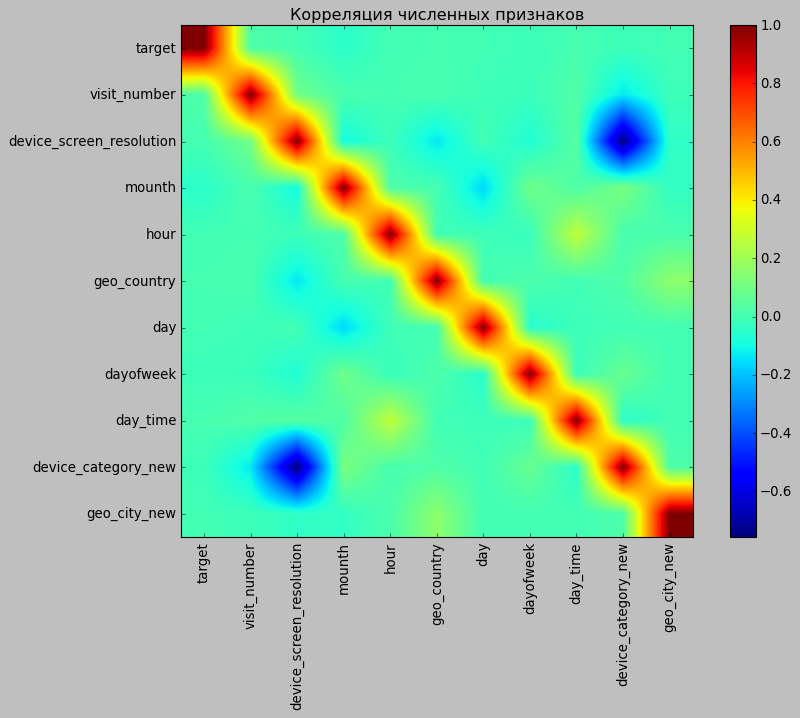

In [50]:
plt.figure(figsize=(12, 8))

columns = df.corr().columns.tolist()
plt.imshow(df.corr())

plt.title("Корреляция численных признаков")
plt.xticks(range(0, len(columns)), columns, rotation = 90)
plt.yticks(range(0, len(columns)), columns)
plt.colorbar()
plt.show()

<Axes: >

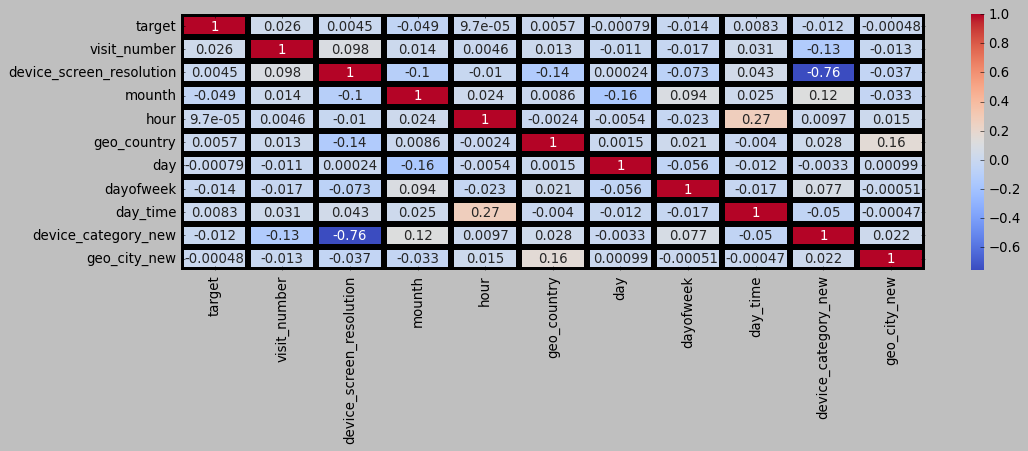

In [51]:
fig, ax = plt.subplots(figsize=(15, 4))
sns.heatmap(df.corr(), annot = True,cmap= 'coolwarm', linewidths=5, linecolor='black')


# 5.Стандартизация данных

In [52]:
df_to_ohe.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'target', 'day', 'dayofweek', 'mounth',
       'hour', 'day_time', 'device_category_new', 'geo_city_new'],
      dtype='object')

In [53]:
#Удаляем столбец utm_keyword, так как в нем пропущено 59.198282% значений
#Удаляем столбец device_model, так как в нем пропущено 99.220368% значений
#Удаляем остальные ненужные на данном этапе столбцы,

df_fin = df_to_ohe.drop(columns=['session_id', 'client_id', 'visit_date', 'visit_time', 
                                 'device_category', 'geo_city', 'utm_keyword', 'device_model'])

In [54]:
df_fin.columns

Index(['visit_number', 'utm_source', 'utm_medium', 'utm_campaign',
       'utm_adcontent', 'device_os', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country', 'target',
       'day', 'dayofweek', 'mounth', 'hour', 'day_time', 'device_category_new',
       'geo_city_new'],
      dtype='object')

In [55]:
df_fin.to_csv('data/df_toohe.csv', index=False)

In [56]:
df_fin = pd.read_csv('data/df_toohe.csv', low_memory=False)
df_fin

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_os,device_brand,device_screen_resolution,device_browser,geo_country,target,day,dayofweek,mounth,hour,day_time,device_category_new,geo_city_new
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,Android,Huawei,259200,Chrome,1,0,24,2,11,14,2,1,0
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,Android,Samsung,328790,Samsung Internet,1,0,14,6,11,8,1,1,1
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,Android,Huawei,259200,Chrome,1,0,28,1,12,2,0,1,0
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,Android,Xiaomi,308898,Chrome,1,0,29,5,5,5,1,1,1
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,Android,Xiaomi,308898,Chrome,1,0,29,5,5,5,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781969,1,BHcvLfOaCWvWTykYqHVe,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,Windows,Microsoft,2073600,Chrome,1,0,22,2,12,10,2,0,1
1781970,1,fDLlAcSmythWSCVMvqvL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,iOS,Apple,329160,Safari,1,0,26,2,5,8,1,1,0
1781971,1,fDLlAcSmythWSCVMvqvL,banner,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,iOS,Apple,250125,Safari,1,0,15,0,11,15,2,1,1
1781972,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,Android,Xiaomi,334443,Chrome,1,0,29,0,11,15,2,1,0


In [57]:
quant_vars = ['visit_number', 'device_screen_resolution', 'mounth', 'hour','geo_country',
              'day', 'dayofweek', 'day_time',
              'device_category_new', 'geo_city_new']#делает датасет с количественные данные
std_scaler = StandardScaler()#Создать объект класса StandardScaler для последующей работы
std_scaler

StandardScaler()

In [58]:
std_scaler.fit(df_fin[quant_vars])
std_scaled = std_scaler.transform(df_fin[quant_vars])#Применить преобразование через стандартизацию с помощью transform, 
#в котором из каждого значения сначала будет вычтено среднее, а затем результат поделен на стандартное отклонение (корень из дисперсии)

data_std = [c+'_std' for c in df_fin[quant_vars]]
df_fin[data_std] = std_scaled
df_fin.columns.to_list()

['visit_number',
 'utm_source',
 'utm_medium',
 'utm_campaign',
 'utm_adcontent',
 'device_os',
 'device_brand',
 'device_screen_resolution',
 'device_browser',
 'geo_country',
 'target',
 'day',
 'dayofweek',
 'mounth',
 'hour',
 'day_time',
 'device_category_new',
 'geo_city_new',
 'visit_number_std',
 'device_screen_resolution_std',
 'mounth_std',
 'hour_std',
 'geo_country_std',
 'day_std',
 'dayofweek_std',
 'day_time_std',
 'device_category_new_std',
 'geo_city_new_std']

In [59]:
#проверим, не изменились ли показатели корреляции, после стандартизации
df = df_fin[['device_screen_resolution', 'mounth', 'day', 'hour',
            'geo_country', 'day', 'dayofweek', 'day_time',
              'device_category_new', 'geo_city_new',
              'device_screen_resolution_std','mounth_std', 'day_std', 'hour_std', 
              'geo_country_std', 'day_std', 'dayofweek_std', 'day_time_std',
              'device_category_new_std', 'geo_city_new_std']]
df.corr()
#не изменились

,device_screen_resolution,mounth,day,hour,geo_country,day,dayofweek,day_time,device_category_new,geo_city_new,device_screen_resolution_std,mounth_std,day_std,hour_std,geo_country_std,day_std,dayofweek_std,day_time_std,device_category_new_std,geo_city_new_std
device_screen_resolution,1.000000,-0.101934,0.000245,-0.010270,-0.135789,0.000245,-0.072963,0.042937,-0.756976,-0.037435,1.000000,-0.101934,0.000245,-0.010270,-0.135789,0.000245,-0.072963,0.042937,-0.756976,-0.037435
mounth,-0.101934,1.000000,-0.161741,0.023924,0.008592,-0.161741,0.094249,0.024683,0.118413,-0.032793,-0.101934,1.000000,-0.161741,0.023924,0.008592,-0.161741,0.094249,0.024683,0.118413,-0.032793
day,0.000245,-0.161741,1.000000,-0.005422,0.001484,1.000000,-0.055829,-0.012017,-0.003330,0.000992,0.000245,-0.161741,1.000000,-0.005422,0.001484,1.000000,-0.055829,-0.012017,-0.003330,0.000992
hour,-0.010270,0.023924,-0.005422,1.000000,-0.002388,-0.005422,-0.022919,0.268108,0.009688,0.015022,-0.010270,0.023924,-0.005422,1.000000,-0.002388,-0.005422,-0.022919,0.268108,0.009688,0.015022
geo_country,-0.135789,0.008592,0.001484,-0.002388,1.000000,0.001484,0.021068,-0.004016,0.027589,0.158699,-0.135789,0.008592,0.001484,-0.002388,1.000000,0.001484,0.021068,-0.004016,0.027589,0.158699
day,0.000245,-0.161741,1.000000,-0.005422,0.001484,1.000000,-0.055829,-0.012017,-0.003330,0.000992,0.000245,-0.161741,1.000000,-0.005422,0.001484,1.000000,-0.055829,-0.012017,-0.003330,0.000992
dayofweek,-0.072963,0.094249,-0.055829,-0.022919,0.021068,-0.055829,1.000000,-0.016974,0.076585,-0.000512,-0.072963,0.094249,-0.055829,-0.022919,0.021068,-0.055829,1.000000,-0.016974,0.076585,-0.000512
day_time,0.042937,0.024683,-0.012017,0.268108,-0.004016,-0.012017,-0.016974,1.000000,-0.049850,-0.000470,0.042937,0.024683,-0.012017,0.268108,-0.004016,-0.012017,-0.016974,1.000000,-0.049850,-0.000470
device_category_new,-0.756976,0.118413,-0.003330,0.009688,0.027589,-0.003330,0.076585,-0.049850,1.000000,0.021675,-0.756976,0.118413,-0.003330,0.009688,0.027589,-0.003330,0.076585,-0.049850,1.000000,0.021675
geo_city_new,-0.037435,-0.032793,0.000992,0.015022,0.158699,0.000992,-0.000512,-0.000470,0.021675,1.000000,-0.037435,-0.032793,0.000992,0.015022,0.158699,0.000992,-0.000512,-0.000470,0.021675,1.000000


In [60]:
df_fin.columns.tolist()

['visit_number',
 'utm_source',
 'utm_medium',
 'utm_campaign',
 'utm_adcontent',
 'device_os',
 'device_brand',
 'device_screen_resolution',
 'device_browser',
 'geo_country',
 'target',
 'day',
 'dayofweek',
 'mounth',
 'hour',
 'day_time',
 'device_category_new',
 'geo_city_new',
 'visit_number_std',
 'device_screen_resolution_std',
 'mounth_std',
 'hour_std',
 'geo_country_std',
 'day_std',
 'dayofweek_std',
 'day_time_std',
 'device_category_new_std',
 'geo_city_new_std']

In [61]:
# Преобразование категориальных переменных OneHotEncoder
data = df_fin[['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent', 
               'device_os', 'device_brand','device_browser',]]#делаем датасет из кат переменных
ohe = OneHotEncoder(sparse=False)#создаем объект класса OneHotEncoder
ohe

OneHotEncoder(sparse=False)

In [62]:
ohe.fit(data)#Идентифицируем параметры преобразования

d:\Program files\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(sparse=False, sparse_output=False)

In [63]:
ohe_transform = ohe.transform(data) #Применяем преобразование для датафрейма с категориальными переменными и сохраняем в новую переменную.
ohe.get_feature_names_out()
df_fin[ohe.get_feature_names_out()] = ohe_transform #Добавляем в датафрейм получившиеся новые признаки
df_fin.head()

C:\Users\semen\AppData\Local\Temp\ipykernel_1264\3185759460.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fin[ohe.get_feature_names_out()] = ohe_transform #Добавляем в датафрейм получившиеся новые признаки
C:\Users\semen\AppData\Local\Temp\ipykernel_1264\3185759460.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_fin[ohe.get_feature_names_out()] = ohe_transform #Добавляем в датафрейм получившиеся новые признаки
C:\Users\semen\AppData\Local\Temp\ipykernel_1264\3185759460.py:3: PerformanceWarning: DataFrame is highl

,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,device_os,device_brand,device_screen_resolution,device_browser,geo_country,...,device_browser_Android Webview,device_browser_Chrome,device_browser_Edge,device_browser_Firefox,device_browser_Opera,device_browser_Safari,device_browser_Safari (in-app),device_browser_Samsung Internet,device_browser_YaBrowser,device_browser_other
0,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,Android,Huawei,259200,Chrome,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,Android,Samsung,328790,Samsung Internet,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,Android,Huawei,259200,Chrome,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,other,Android,Xiaomi,308898,Chrome,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,kjsLglQLzykiRbcDiGcD,cpc,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,Android,Xiaomi,308898,Chrome,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [64]:
#удаляем ненужные колонки
df_fin = df_fin.drop(columns=[   'utm_source','visit_number',
                                 'utm_medium', 'utm_campaign', 'utm_adcontent', 
                                  'device_os', 'device_brand','device_browser',
                                 'device_screen_resolution', 'geo_country',
                                  'day', 'dayofweek', 'mounth','hour', 'day_time',
                                 'device_category_new', 'geo_city_new', 'visit_number_std',
                                 ])
df_fin

,target,device_screen_resolution_std,mounth_std,hour_std,geo_country_std,day_std,dayofweek_std,day_time_std,device_category_new_std,geo_city_new_std,...,device_browser_Android Webview,device_browser_Chrome,device_browser_Edge,device_browser_Firefox,device_browser_Opera,device_browser_Safari,device_browser_Safari (in-app),device_browser_Samsung Internet,device_browser_YaBrowser,device_browser_other
0,0,-0.497732,0.784462,0.063104,0.169718,0.785091,-0.397037,0.317324,0.458795,-1.092920,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,-0.398860,0.784462,-0.916367,0.169718,-0.352091,1.615709,-0.582063,0.458795,0.088431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0,-0.497732,1.235775,-1.895838,0.169718,1.239964,-0.900223,-1.481450,0.458795,-1.092920,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,-0.427122,-1.923416,-1.406102,0.169718,1.353682,1.112522,-0.582063,0.458795,0.088431,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,-0.427122,-1.923416,-1.406102,0.169718,1.353682,1.112522,-0.582063,0.458795,0.088431,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1781969,0,2.080131,1.235775,-0.589876,0.169718,0.557655,-0.397037,0.317324,-1.938907,0.088431,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1781970,0,-0.398335,-1.923416,-0.916367,0.169718,1.012528,-0.397037,-0.582063,0.458795,-1.092920,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1781971,0,-0.510626,0.784462,0.226350,0.169718,-0.238372,-1.403410,0.317324,0.458795,0.088431,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1781972,0,-0.390829,0.784462,0.226350,0.169718,1.353682,-1.403410,0.317324,0.458795,-1.092920,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [65]:
#сохраняем датасет в файл
df_fin.to_csv('data/df_forML.csv', index=False)